### Оптимизация портфеля

Иницилизация, константы

In [1]:
from pfp_products import *
from pfp_optimization import *
from pfp_stat import *
import numpy as np
import pandas as pd 

# set constants & assumbtions

n_scenarios = 1000
simulation_years = 10         # срок моделирования инструментов - 10 лет
client_term = 10              # срок портфеля - 10 лет
points_in_year = 12           # 12 модельных точек в году

Моделируем базовые активы и продукты.
Сейчас, в тестовом режиме, этот модуль выводит статистики по моделируемым инструментам: средние, волатильности и корреляции. Все - annualized.

In [2]:
# базовые активы
BAs = read_prodcat('prodcat.xlsx')[2]
prices = ba_scenarios(BAs, simulation_years, points_in_year, n_scenarios)

# продукты
total, names = calc_products2(prices, simulation_years, points_in_year, client_term)

Means: 
XLP us equity        0.048813
ADS GY equity        0.167868
DIS us equity        0.110666
BAYN GY Equity       0.051034
SBER LI EQUITY       0.027361
NOVN SE Equity       0.032227
PIMGCIA ID equity    0.031510
ROG SE Equity        0.005159
TRDPTNT RU EQUITY    0.102709
SAN FP Equity       -0.033702
PFE UN Equity        0.045947
TRDILMS RU EQUITY    0.065819
TRDDRUZ RU EQUITY    0.108175
IXN us equity        0.168959
DAL us equity        0.231161
HEN3 GY equity       0.070517
DAI GY equity        0.073006
MCD us equity        0.097899
dtype: float64
Sigmas: 
XLP us equity        0.014980
ADS GY equity        0.035377
DIS us equity        0.025126
BAYN GY Equity       0.031690
SBER LI EQUITY       0.058693
NOVN SE Equity       0.025714
PIMGCIA ID equity    0.004473
ROG SE Equity        0.025640
TRDPTNT RU EQUITY    0.021622
SAN FP Equity        0.029694
PFE UN Equity        0.024172
TRDILMS RU EQUITY    0.010403
TRDDRUZ RU EQUITY    0.014571
IXN us equity        0.019998
DAL us e

Строим распределение доходностей, считаем среднюю доходность, волатильности фин результата и риск (средние потери) по всем продуктам, участвующим в расчете.

1.0 		 ИСЖ ГФО


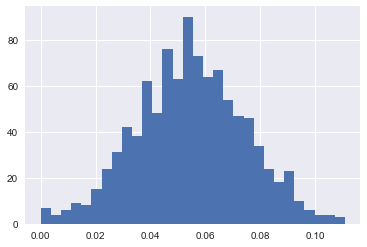

income = 		 0.0547333629045
volatility = 		 0.0198927222621
risk =   		 0
------------------------
1.0 		 ИСЖ новые технологии


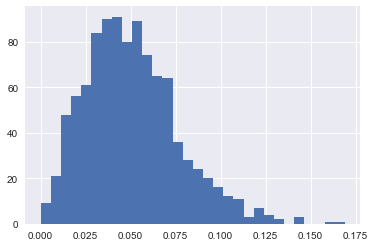

income = 		 0.0507035795822
volatility = 		 0.0260341469417
risk =   		 0
------------------------
1.0 		 ИСЖ потребительские товары


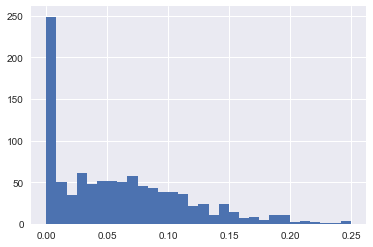

income = 		 0.0591069319263
volatility = 		 0.0536105071658
risk =   		 0
------------------------
1.0 		 ИСЖ MCD DAL DIS


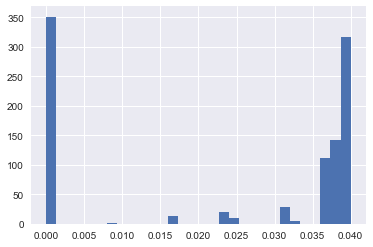

income = 		 0.0240143963293
volatility = 		 0.0180938634713
risk =   		 0
------------------------
1.0 		 ИСЖ дойче купон


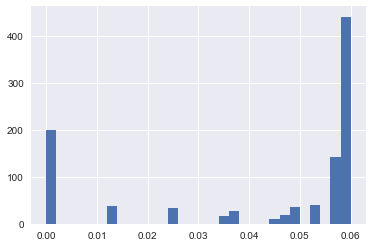

income = 		 0.0424530730696
volatility = 		 0.0239225042259
risk =   		 0
------------------------
1.0 		 ИСЖ 4 фармы


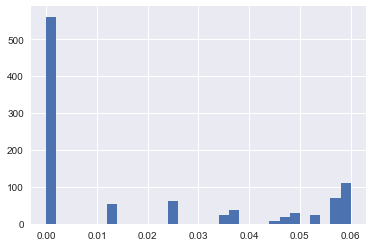

income = 		 0.0190439400287
volatility = 		 0.0242059977108
risk =   		 0
------------------------
1.0 		 ИСЖ 4+1 фармы


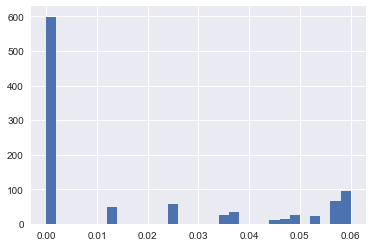

income = 		 0.0173688600958
volatility = 		 0.0236627510999
risk =   		 0
------------------------
1.0 		 Callable note MCD


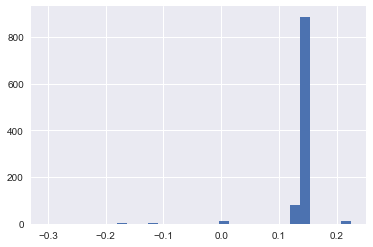

income = 		 0.143211728447
volatility = 		 0.035030615342
risk =   		 0.15721498051
------------------------
1.0 		 Депозит 1


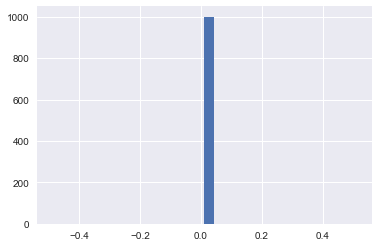

income = 		 0.01
volatility = 		 0
risk =   		 0
------------------------
1.0 		 Депозит 2


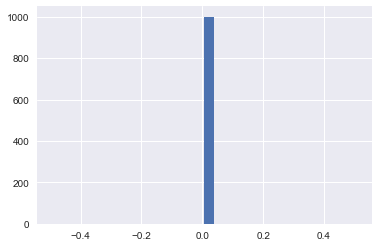

income = 		 0.00601652753096
volatility = 		 0
risk =   		 0
------------------------
1.0 		 ПИФ "Илья Муромец"


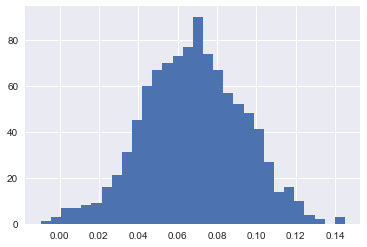

income = 		 0.0678185955888
volatility = 		 0.0253319719407
risk =   		 0.00381555214506
------------------------
1.0 		 ПИФ "Компании малой капитализации"


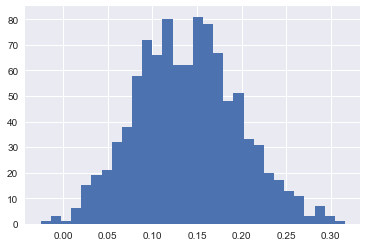

income = 		 0.139167310002
volatility = 		 0.0580183052876
risk =   		 0.0135086537571
------------------------
1.0 		 ПИФ "Сбалансированный"


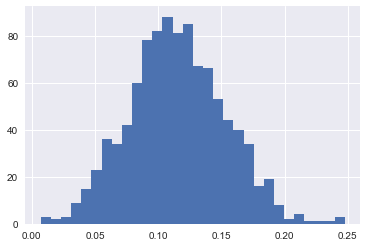

income = 		 0.11497157704
volatility = 		 0.0380183379784
risk =   		 0
------------------------
1.0 		 БСО АДР Сбербанка


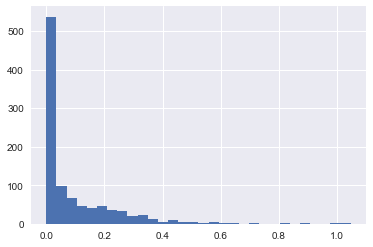

income = 		 0.0894191549433
volatility = 		 0.137834350882
risk =   		 0
------------------------


In [3]:
%matplotlib inline

# на какие продукты смотрим?
for i in range(0,len(names)):
    weights = np.zeros(len(names))
    weights[i] = 1
    report(weights, total, names)

#### Теперь будем оптимизировать.
Сначала попробуем штрафровать функицю полезности за уровень риска портфеля и уровень волатильности финансового результата.
Если штрафовать строго - останется только депозит, в котором нет ни риска, ни волатильности:

1.0 		 Депозит 1


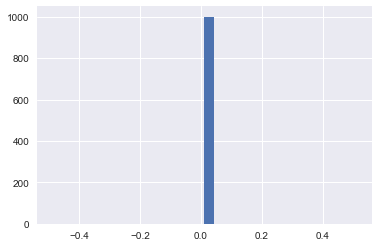

income = 		 0.01
volatility = 		 0
risk =   		 0
------------------------
CPU times: user 5min 20s, sys: 3.89 s, total: 5min 24s
Wall time: 5min 25s


In [4]:
%%time

#поехали
vol_penalty = 1
risk_penalty = 1

weights, func = find_best_wghts(total, vol_penalty, risk_penalty)
report(np.round(weights,2), total, names, vol_penalty, risk_penalty) 

Теперь уменьшим штраф за волатильность. Видно, что в портфель попало больше инструментов, причем основную долю забрали ГФО (38%), Новые технологии (23%) и ПИФ Илья Муромец (17%).

0.38 		 ИСЖ ГФО
0.23 		 ИСЖ новые технологии
0.05 		 ИСЖ MCD DAL DIS
0.12 		 ИСЖ дойче купон
0.17 		 ПИФ "Илья Муромец"
0.05 		 ПИФ "Сбалансированный"


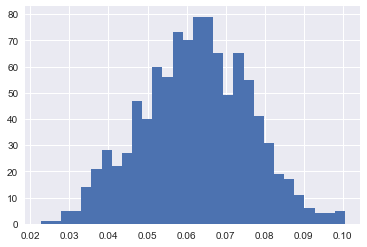

income = 		 0.0623012662845
volatility = 		 0.0137353985309
risk =   		 0
------------------------
CPU times: user 5min 37s, sys: 3.46 s, total: 5min 40s
Wall time: 5min 40s


In [5]:
%%time
#поехали
vol_penalty = 0.5
risk_penalty = 1

weights, func = find_best_wghts(total, vol_penalty, risk_penalty)
report(np.round(weights,2), total, names, vol_penalty, risk_penalty) 

Уберем штраф за волатильность совсем. 
Теперь модель старательно минимизирует риск, но на волатильность доходности не обращет внимания. И максимизирует среднюю доходность.

Баланс в портфеле изменился. 
Теперь ГФО 11%, БСО на АДР Сбера - 9%, а ПИФ компаний малой капитализации - 57%!
Тут еще надо обратить внимание на Сбалансированный - текущие настройки ограничивают его долю 20%, к которой он подобрался вплотную.

0.11 		 ИСЖ ГФО
0.02 		 ИСЖ новые технологии
0.57 		 ПИФ "Компании малой капитализации"
0.2 		 ПИФ "Сбалансированный"
0.09 		 БСО АДР Сбербанка


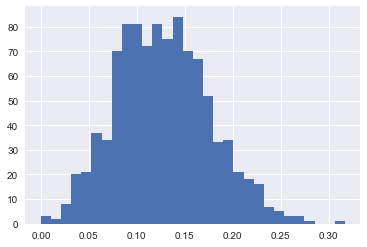

income = 		 0.127403818066
volatility = 		 0.048988403485
risk =   		 0.000284190549023
------------------------
CPU times: user 4min 21s, sys: 3.99 s, total: 4min 25s
Wall time: 4min 43s


In [6]:
%%time
#поехали
vol_penalty = 0
risk_penalty = 1

weights, func = find_best_wghts(total, vol_penalty, risk_penalty)
report(np.round(weights,2), total, names, vol_penalty, risk_penalty) 

Отменим штрафы за волатильности и риск совсем.
Как и ожидалось - модель оставляет в портфеле всего один продукт - ПИФ компаний малой капитализации.

1.0 		 ПИФ "Компании малой капитализации"


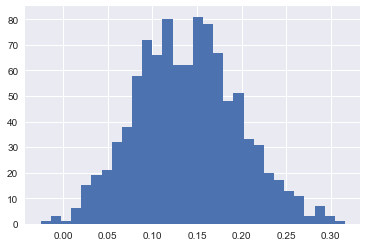

income = 		 0.139167310002
volatility = 		 0.0580183052876
risk =   		 0.0135086537571
------------------------
CPU times: user 2min 38s, sys: 2.31 s, total: 2min 40s
Wall time: 2min 41s


In [7]:
%%time
#поехали
vol_penalty = 0
risk_penalty = 0

weights, func = find_best_wghts(total, vol_penalty, risk_penalty)
report(np.round(weights,2), total, names, vol_penalty, risk_penalty) 